# Lab 6 - linear algebra ... in SageMath!

OK, as part of "linear algebra review week" let's see how SageMath can make our lives easier when working with vectors and matrices.

First of all, we can easily create vectors and matrices

In [1]:
var('v1,v2,v3,m11,m12,m13,m21,m22,m23,m31,m32,m33') #tell sagemath that these symbols are purely symbolic (so it doesnt look for a previous definition)

#vectors
v = vector([v1,v2,v3]) 

#matrices
M = matrix([[m11,m12,m13],[m21,m22,m23],[m31,m32,m33]])

Note that our vector is displayed as a row vector (so has dimensions 1x3)

In [2]:
show(v)

(v1, v2, v3)

Our matrix has 3 rows and 3 columns (3x3)

In [28]:
show(M)

[m11 m12 m13]
[m21 m22 m23]

So we should only be able to multiply our vector by the matrix on the right, ie $vM$

In [35]:
v * M

(m11*v1 + m21*v2 + m31*v3, m12*v1 + m22*v2 + m32*v3, m13*v1 + m23*v2 + m33*v3)

But we see that $Mv$ also works, which it shouldn't!|

In [3]:
M * v

(m11*v1 + m12*v2 + m13*v3, m21*v1 + m22*v2 + m23*v3, m31*v1 + m32*v2 + m33*v3)

This is because SageMath treats row and column vectors the same, and chooses whatever representation is needed for things like matrix mutliplication to work out. This is convenient in a sense because we don't have to specify if a vector is a row or column vector, but this is also dangerous because you may be able to do operations in SageMath that you shouldn't be able to do, eg, if $v$ really is a column vector, you shouldn't be able to do $vM$, but SageMath won't alert you to that error. 

It is straightforward to plot vectors

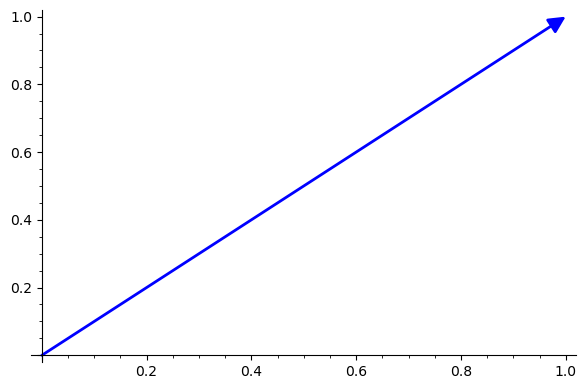

In [63]:
v = vector([1,1])
plot(v)

And therefore also to observe their translation by a matrix

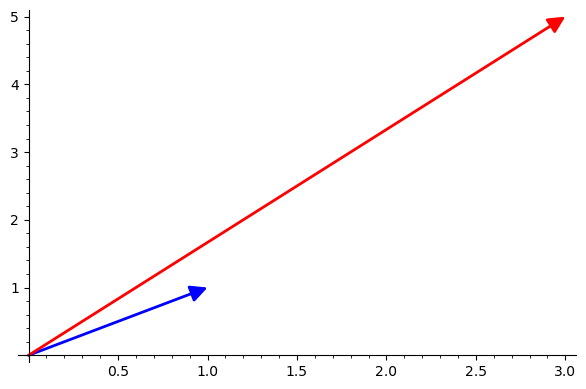

In [69]:
M = matrix([[1,2],[3,2]])
plot(v) + plot(M*v, color="red")

We can make a few special vectors and matrices quickly, like a diagonal matrix

In [72]:
diagonal_matrix([1..4,step=1]) #here [1..4,step=1] just gives the numbers between 1 and 4 taking a step of 1, ie 1,2,3,4; it is the same as range(1,5)

[1 0 0 0]
[0 2 0 0]
[0 0 3 0]
[0 0 0 4]

the identity matrix of some dimension

In [73]:
identity_matrix(5)

[1 0 0 0 0]
[0 1 0 0 0]
[0 0 1 0 0]
[0 0 0 1 0]
[0 0 0 0 1]

or the zero vector of some dimension

In [76]:
zero_vector(2)

(0, 0)

which is also created by default if you only give the type of entries (QQ = rational, ZZ=integers, CC=complex, SR=symbolic) and the number of dimensions

In [120]:
vector(QQ,2)

(0, 0)

Same goes for matrices

In [121]:
matrix(QQ,3,4)

[0 0 0 0]
[0 0 0 0]
[0 0 0 0]

Note that if you give the dimensions you can supply the entries as a list and they will automatically be placed sequentially into a matrix

In [129]:
M = matrix(3,3,range(3*3)) #a 3x3 matrix of numbers from 0 to 8
M

[0 1 2]
[3 4 5]
[6 7 8]

As we saw above for mutliplication, the basic operations of addition/subtraction and multiplication are coded as they were for scalars

In [4]:
v = vector([v1,v2])
u = vector([v1,v3])

In [5]:
u + v

(2*v1, v2 + v3)

In [6]:
u - v

(0, -v2 + v3)

In [7]:
M = matrix([[m11,m12,m13],[m21,m22,m23],[m31,m32,m33]])

In [8]:
M + M

[2*m11 2*m12 2*m13]
[2*m21 2*m22 2*m23]
[2*m31 2*m32 2*m33]

In [9]:
M * M

[  m11^2 + m12*m21 + m13*m31 m11*m12 + m12*m22 + m13*m32 m11*m13 + m12*m23 + m13*m33]
[m11*m21 + m21*m22 + m23*m31   m12*m21 + m22^2 + m23*m32 m13*m21 + m22*m23 + m23*m33]
[m11*m31 + m21*m32 + m31*m33 m12*m31 + m22*m32 + m32*m33   m13*m31 + m23*m32 + m33^2]

In [10]:
3 * M

[3*m11 3*m12 3*m13]
[3*m21 3*m22 3*m23]
[3*m31 3*m32 3*m33]

You'll have to be careful in all these cases that the dimensions match

In [11]:
w = vector([v1,v2,v3])
w + v #try adding a vector of dimenion 3 with one of dimension 2

TypeError: unsupported operand parent(s) for +: 'Vector space of dimension 3 over Symbolic Ring' and 'Vector space of dimension 2 over Symbolic Ring'

Note this error says (on the last line, which is always where you should start looking) that we cannot use "+" for a vector of dimension 3 and dimension 2. 

**Q1** [1 point] Make three distinct 4x4 matrices A, B, C with arbitrary numeric entries and show that the associative law $A(BC)=A(BC)$ and distributive law $(A+B)C=AC+BC$ hold

**Q2** [1 point] Make a non-zero 3x3 matrix with arbitrary numeric entries and show that multiplication by the identity matrix returns the original matrix

**Q3** [1 point] Using $A = \begin{pmatrix} 1 & 2 \\ 2 & 1 \end{pmatrix}$, $B = \begin{pmatrix} 1 & 1 \\ 3 & 1 \end{pmatrix}$, $C = \begin{pmatrix} 7 & 3 \\ 5 & 3 \end{pmatrix}$, $D = \begin{pmatrix} 2 & 1 \\ 2 & 5 \end{pmatrix}$, show that the commutative law does not hold for matrix multiplication. In particular, that $AB=C$ and $ABD=CD$ but $ABD\neq DC$

Moving on, we can also extract properties of a matrix, like the trace and determinant

In [20]:
M = matrix([[m11,m12,m13],[m21,m22,m23],[m31,m32,m33]])
show(M.trace())
show(M.determinant())

m11 + m22 + m33

-(m23*m32 - m22*m33)*m11 + (m13*m32 - m12*m33)*m21 - (m13*m22 - m12*m23)*m31

We can also take the transpose or inverse

In [21]:
M.transpose()

[m11 m21 m31]
[m12 m22 m32]
[m13 m23 m33]

In [22]:
M.inverse()

[-(m13/m11 - m12*(m13*m21/m11 - m23)/(m11*(m12*m21/m11 - m22)))*(m21*(m12*m31/m11 - m32)/(m11*(m12*m21/m11 - m22)) - m31/m11)/((m13*m21/m11 - m23)*(m12*m31/m11 - m32)/(m12*m21/m11 - m22) - m13*m31/m11 + m33) + 1/m11 - m12*m21/(m11^2*(m12*m21/m11 - m22))                                    (m12*m31/m11 - m32)*(m13/m11 - m12*(m13*m21/m11 - m23)/(m11*(m12*m21/m11 - m22)))/((m12*m21/m11 - m22)*((m13*m21/m11 - m23)*(m12*m31/m11 - m32)/(m12*m21/m11 - m22) - m13*m31/m11 + m33)) + m12/(m11*(m12*m21/m11 - m22))                                                                                                             -(m13/m11 - m12*(m13*m21/m11 - m23)/(m11*(m12*m21/m11 - m22)))/((m13*m21/m11 - m23)*(m12*m31/m11 - m32)/(m12*m21/m11 - m22) - m13*m31/m11 + m33)]
[                                  -(m13*m21/m11 - m23)*(m21*(m12*m31/m11 - m32)/(m11*(m12*m21/m11 - m22)) - m31/m11)/((m12*m21/m11 - m22)*((m13*m21/m11 - m23)*(m12*m31/m11 - m32)/(m12*m21/m11 - m22) - m13*m31/m11 + m33)) + m21/(m11*(m12*m

**Q4** [1 point] Show that the inverse of a diagonal matrix $D$ (just use some arbitrary dimension and non-zero numeric entries) is equal to a diagonal matrix with each diagonal entry inverted

**Q5** [1 point] Using the generic 3x3 $M$ just defined, show that a matrix multiplied by its inverse is the identity matrix (it may take a little massaging to get SageMath to tell you this, remember the useful commands ```factor```, ```simplify```, ```expand```)

**Q6** Using the $M$ just defined, show that the determinant of the transpose is equal to the determinant of the original (it may take a little massaging to get SageMath to tell you this, remember that $a = b$ is equivalent to $a - b = 0$, and the latter is sometimes easier to prove; also remember the useful commands ```factor```, ```simplify```, ```expand```)

And we can also solve linear algebra equations using ```solve_right```, which gives the solution $n$ to $Mn=v$

In [49]:
v = vector([v1,v2,v3])
M.solve_right(v)

(-((m12*m31/m11 - m32)*(m21*v1/m11 - v2)/(m12*m21/m11 - m22) - m31*v1/m11 + v3)*(m13/m11 - m12*(m13*m21/m11 - m23)/(m11*(m12*m21/m11 - m22)))/((m13*m21/m11 - m23)*(m12*m31/m11 - m32)/(m12*m21/m11 - m22) - m13*m31/m11 + m33) - m12*(m21*v1/m11 - v2)/(m11*(m12*m21/m11 - m22)) + v1/m11, -(m13*m21/m11 - m23)*((m12*m31/m11 - m32)*(m21*v1/m11 - v2)/(m12*m21/m11 - m22) - m31*v1/m11 + v3)/((m12*m21/m11 - m22)*((m13*m21/m11 - m23)*(m12*m31/m11 - m32)/(m12*m21/m11 - m22) - m13*m31/m11 + m33)) + (m21*v1/m11 - v2)/(m12*m21/m11 - m22), ((m12*m31/m11 - m32)*(m21*v1/m11 - v2)/(m12*m21/m11 - m22) - m31*v1/m11 + v3)/((m13*m21/m11 - m23)*(m12*m31/m11 - m32)/(m12*m21/m11 - m22) - m13*m31/m11 + m33))

Similarly, ```solve_left``` gives the solution to $nM=v$

In [51]:
M.solve_left(v)

(((m13*m21/m11 - m23)*(m12*v1/m11 - v2)/(m12*m21/m11 - m22) - m13*v1/m11 + v3)*(m21*(m12*m31/m11 - m32)/(m11*(m12*m21/m11 - m22)) - m31/m11)/((m13*m21/m11 - m23)*(m12*m31/m11 - m32)/(m12*m21/m11 - m22) - m13*m31/m11 + m33) - m21*(m12*v1/m11 - v2)/(m11*(m12*m21/m11 - m22)) + v1/m11, -(m12*m31/m11 - m32)*((m13*m21/m11 - m23)*(m12*v1/m11 - v2)/(m12*m21/m11 - m22) - m13*v1/m11 + v3)/((m12*m21/m11 - m22)*((m13*m21/m11 - m23)*(m12*m31/m11 - m32)/(m12*m21/m11 - m22) - m13*m31/m11 + m33)) + (m12*v1/m11 - v2)/(m12*m21/m11 - m22), ((m13*m21/m11 - m23)*(m12*v1/m11 - v2)/(m12*m21/m11 - m22) - m13*v1/m11 + v3)/((m13*m21/m11 - m23)*(m12*m31/m11 - m32)/(m12*m21/m11 - m22) - m13*m31/m11 + m33))

It is a bit tedious to verify this with all symbolic values. So let's check a numeric example

In [56]:
M = matrix(QQ,3,3,[1..(3*3), step=1])
v = vector(QQ,3,[1..3, step=1])

**Q7** [1 point] Find the solution $n$ to $Mn=v$ and check that it satisfies this equation

**Q8** [1 point] Find the solution $n$ to $nM=v$ and check that it satisfies this equation

Alright, and now the final pieces we need are eigenvalues and eigenvectors.

In [27]:
var('a,b,c,d')
M = matrix([[a,b],[c,d]])

As you might expect, the eigenvalues are retrieved with

In [28]:
M.eigenvalues()

[1/2*a + 1/2*d - 1/2*sqrt(a^2 + 4*b*c - 2*a*d + d^2),
 1/2*a + 1/2*d + 1/2*sqrt(a^2 + 4*b*c - 2*a*d + d^2)]

**Q9** [1 point] Show that the sum of the two eigenvalues of this generic 2x2 matrix is the trace

**Q10** [1 point] Show that the product of the two eigenvalues is the determinant

The right eigenvectors are retrieved with

In [32]:
M.eigenvectors_right()

[(1/2*a + 1/2*d - 1/2*sqrt(a^2 + 4*b*c - 2*a*d + d^2),
  [(1, -1/2*(a - d + sqrt(a^2 + 4*b*c - 2*a*d + d^2))/b)],
  1),
 (1/2*a + 1/2*d + 1/2*sqrt(a^2 + 4*b*c - 2*a*d + d^2),
  [(1, -1/2*(a - d - sqrt(a^2 + 4*b*c - 2*a*d + d^2))/b)],
  1)]

For each eigenvector we get a triplet (e,[V],n), where e is the associated eigenvaulue, V is the eigenvector, and n is the multiplicity (just ignore n)

Because the eigenvectors are returned in triplets, we need to extract them, eg, to get the first eigenvector V 

In [33]:
right = M.eigenvectors_right()
right[0][1][0]

(1, -1/2*(a - d + sqrt(a^2 + 4*b*c - 2*a*d + d^2))/b)

**Q11** [1 point] Get the second eigenvector

**Q12** [1 point] Check that $Mv=\lambda v$ for both eigenvalues $\lambda$

Finally, we can get the left eigenvectors too

In [34]:
M.eigenvectors_left()

[(1/2*a + 1/2*d - 1/2*sqrt(a^2 + 4*b*c - 2*a*d + d^2),
  [(1, -1/2*(a - d + sqrt(a^2 + 4*b*c - 2*a*d + d^2))/c)],
  1),
 (1/2*a + 1/2*d + 1/2*sqrt(a^2 + 4*b*c - 2*a*d + d^2),
  [(1, -1/2*(a - d - sqrt(a^2 + 4*b*c - 2*a*d + d^2))/c)],
  1)]

Next lab we'll put all this to use in the context of multivariate linear models in ecology and evolution. There we'll see that the eigenvectors represent the paths along which the system enters/leaves an equilibrium

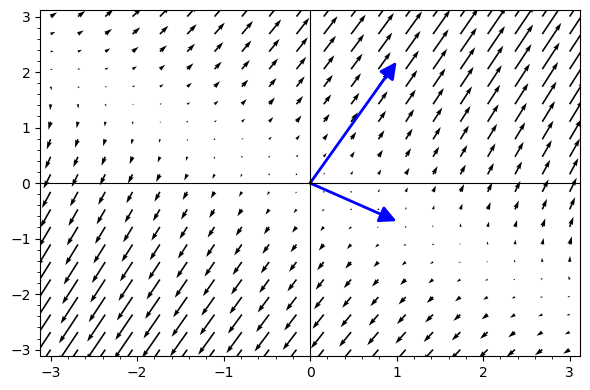

In [51]:
M = matrix(2,2,range(1,5))
right = M.eigenvectors_right()

p = Graphics()
for i in right:
    p += plot(i[1][0])
    
var('x,y')
f = M*vector([x,y])
p += plot_vector_field(f, xrange=[-3,3],yrange=[-3,3])

p